# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [15]:
import pandas as pd

In [16]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [17]:
standard.head()

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구


In [18]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [19]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [20]:
# # 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station.drop('Unnamed: 0', axis = 1, inplace = True)
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336,6597087,123.257234,116.824633
1,강동구,367,22,2515582,2460905,91.578944,89.588445
2,강북구,410,71,3998077,3858057,126.465395,122.036345
3,강서구,567,51,3981173,3963283,86.932767,86.542122
4,관악구,466,81,5862490,5996915,134.946712,138.040996


In [21]:
# # 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_moving.drop('Unnamed: 0', axis = 1, inplace = True)
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,60.151307,41.911289,29075578,20258827.46
1,11020,58.450528,44.128266,28733286,21692705.49
2,11030,58.494740,34.245515,26487237,15506848.68
3,11040,58.879851,39.001257,27279447,18069555.27
4,11050,61.807174,42.697635,26804906,18517366.67


In [22]:
df_seoul_business.drop('Unnamed: 0', axis = 1, inplace = True)
df_seoul_business.head()

,자치구,택시운송,한식일반,용달운송,부동산,헤어,커피,기타주점,옷도매,학원,한식육류
0,종로구,215,5912,646,889,480,3613,1413,962,382,1982
1,중구,235,6414,333,1152,816,3542,982,24248,175,2121
2,용산구,523,2987,466,1214,777,2076,1332,317,573,1184
3,성동구,2527,2785,1161,1453,851,1859,621,1572,1494,1545
4,광진구,1744,2861,985,1313,1337,1887,1577,687,1646,1678


In [23]:
df_seoul_people.drop('Unnamed: 0', axis = 1, inplace = True)
df_seoul_people.head()

,자치구,남자,여자,합계
0,종로구,71890,78563,150453
1,중구,63495,68298,131793
2,용산구,109826,117280,227106
3,성동구,137620,147146,284766
4,광진구,167562,183618,351180


In [24]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

---

In [25]:
pd.set_option('display.max_columns', None)
df.head()

,도착 시군구 코드,자치구,남자,여자,합계,택시운송,한식일반,용달운송,부동산,헤어,커피,기타주점,옷도매,학원,한식육류,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,71890,78563,150453,215,5912,646,889,480,3613,1413,962,382,1982,356,105,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46
1,11020,중구,63495,68298,131793,235,6414,333,1152,816,3542,982,24248,175,2121,173,102,3138112,3050645,113.699710,110.530616,58.450528,44.128266,28733286,21692705.49
2,11030,용산구,109826,117280,227106,523,2987,466,1214,777,2076,1332,317,573,1184,326,69,3495720,3422432,119.962938,117.447907,58.494740,34.245515,26487237,15506848.68
3,11040,성동구,137620,147146,284766,2527,2785,1161,1453,851,1859,621,1572,1494,1545,432,58,2371151,2331836,90.495039,88.994581,58.879851,39.001257,27279447,18069555.27
4,11050,광진구,167562,183618,351180,1744,2861,985,1313,1337,1887,1577,687,1646,1678,274,43,2365355,2382437,107.491706,108.267985,61.807174,42.697635,26804906,18517366.67


In [26]:
df['음식점수'] = df['한식일반'] + df['기타주점'] + df['커피'] + df['한식육류']

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 : **자치구별 면적이 높을수록 정류장수가 많고 평균이동시간이 길 것이다.**

    x1: 자치구별 면적

    x2: 정류장 수

    y: 평균 이동 시간

* 가설 2 : **차량 등록 수가 많은 지역일수록 버스이용량이 많다**

    x: 서울 자치구별 차량 등록수

    y: 버스 출발 인구의 합


* 가설 3 : **음식점 종사자 수가 많을 수록, 유동인구가 많고 평균 이동 시간이 길 것이다.**

    x: 음식점 종사자 수

    y: 유동인구, 평균 이동 시간

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [53]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     
# 한글 폰트 문제 해결을 위한 설정
# plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['axes.unicode_minus'] = False

### 1)


- **변수의 비지니스 의미**

    - 같은 자치구내에서의 평균 이동 시간이 크다는 것은 자치구의 면적이 넓거나 정류장가 많아 정차 횟수가 잦음을 예상할 수 있으며, 또한 노선의 형태가 고르게 분포 되지 못함을 예상 할 수 있습니다.

    - 자치구의 넓이가 클 수록 정류장의 수가 많아지고, 이동 거리 또한 늘어나게 됩니다. 따라서 평균 이동 시간이 넓이와 관계가 있을 것이라 판단됩니다.

    - 정류장수가 증가함에 따라서 정차 빈도가 잦아 평균 이동 시간이 넓이와 관계가 있을 것이라 판단됩니다.
    
- **전처리 사항**
    -  자치구별 넓이, 자치구별 평균 이동 시간의 합, 자치구별 정류장 수를 자치구를 기준으로 merge 하였습니다.
    
- **추가 분석해볼 사항 도출**
    - 추가로 교통량 데이터를 추가하여 평균 이동 시간과 연관이 있는지 확인하여 버스 노선 추가가 유의미한 해결 방안이 될 수 있는지 판단해야합니다.


In [74]:
df_table = pd.read_csv('table.csv').drop('Unnamed: 0',axis=1)

<Axes: xlabel='자치구', ylabel='평균 이동 시간(분)'>

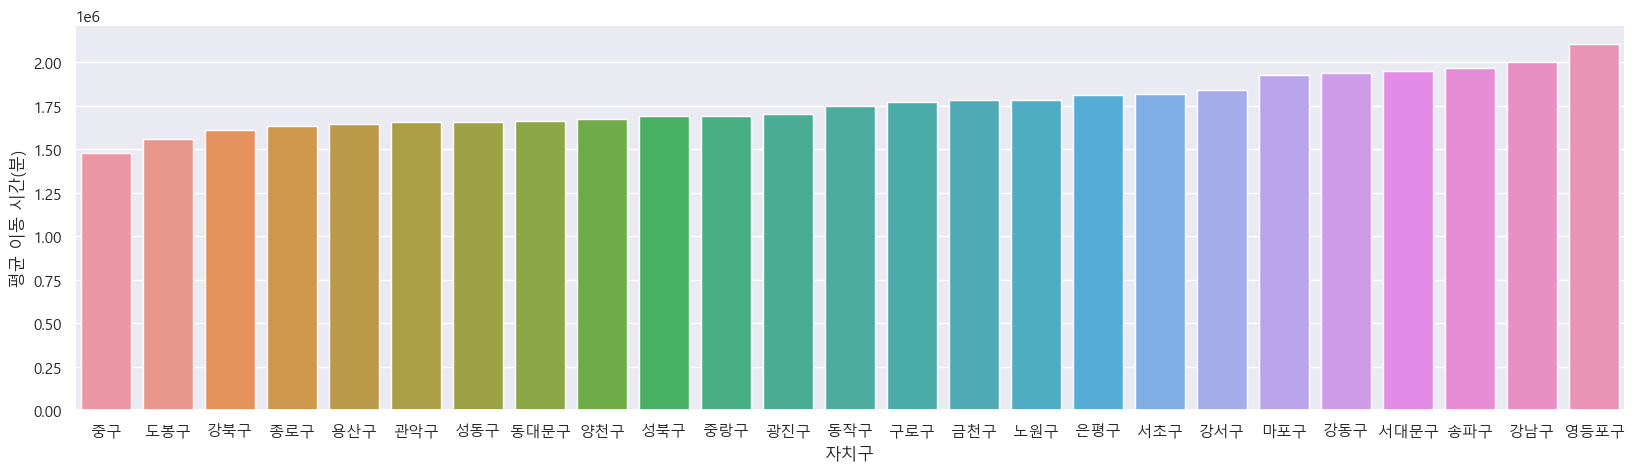

In [75]:
plt.figure(figsize=(20,5))
df_table = df_table.sort_values('평균 이동 시간(분)')
sns.barplot(x='자치구', y='평균 이동 시간(분)',data=df_table)

<Axes: xlabel='자치구', ylabel='넓이'>

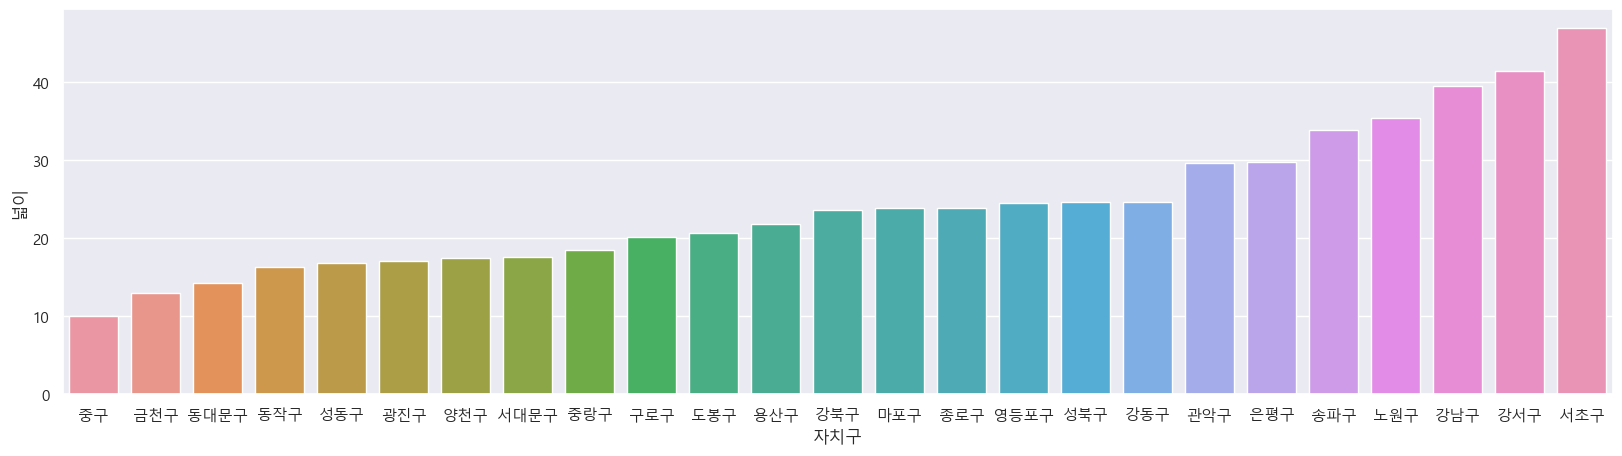

In [76]:
plt.figure(figsize=(20,5))
df_table = df_table.sort_values('넓이')
sns.barplot(x='자치구', y='넓이',data=df_table)

<Axes: xlabel='자치구', ylabel='정류장수'>

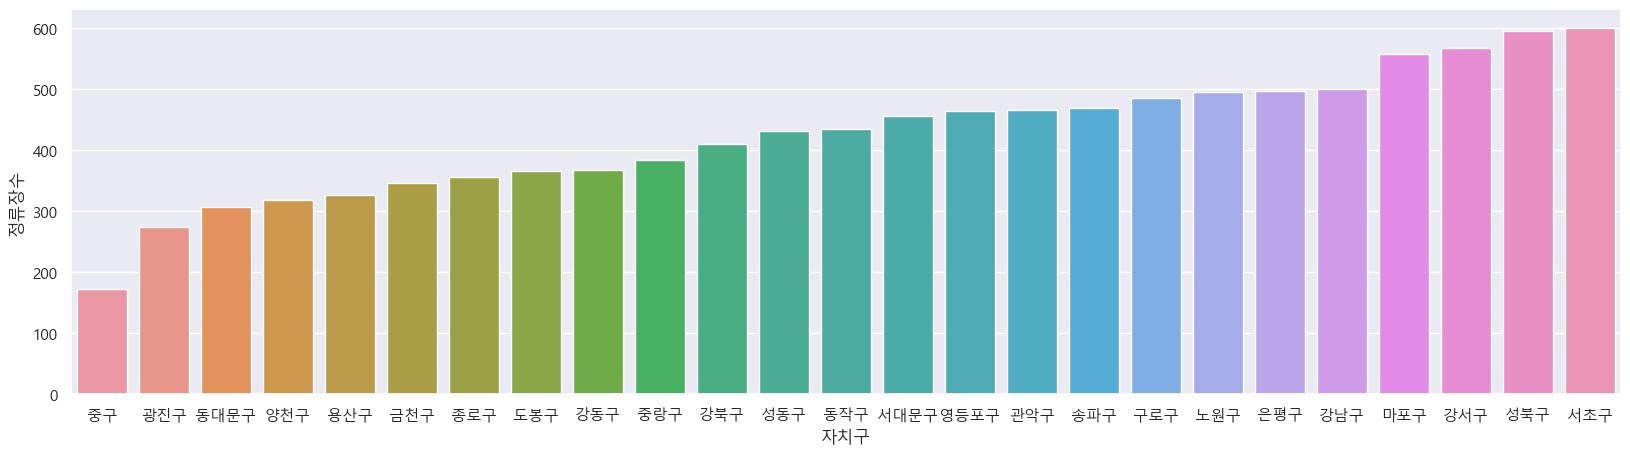

In [77]:
plt.figure(figsize=(20,5))
df_table = df_table.sort_values('정류장수')
sns.barplot(x='자치구', y='정류장수',data=df_table)

### 2)

- **변수의 비즈니스 의미**
    - **자치구** : 서울특별시의 자치구를 의미합니다.

    - **총합** : 자치구별 관용, 자가, 영업용 승합과 승용차의 합을 의미합니다. 이는 각 자치구 별로 승용차의 등록 대수를 알 수 있습니다.

    - **버스출발이동인구합** : 자치구별 버스 출발이동인구의 합을 의미합니다. 이는 서울시민의 거주지의 분포를 유추할 수 있는 데이터가 될 수 있습니다.

- **전처리 사항**
    - 승용, 승합, 화물, 특수 로 나누어져 있는 차량등록 데이터 중에, 대중교통과 관련이 있을 승용, 승합 차량만 따로 합산하여, 상관관계와, p-value를 개선하였습니다. 


In [54]:
car_data = pd.read_csv('car_sum.csv')

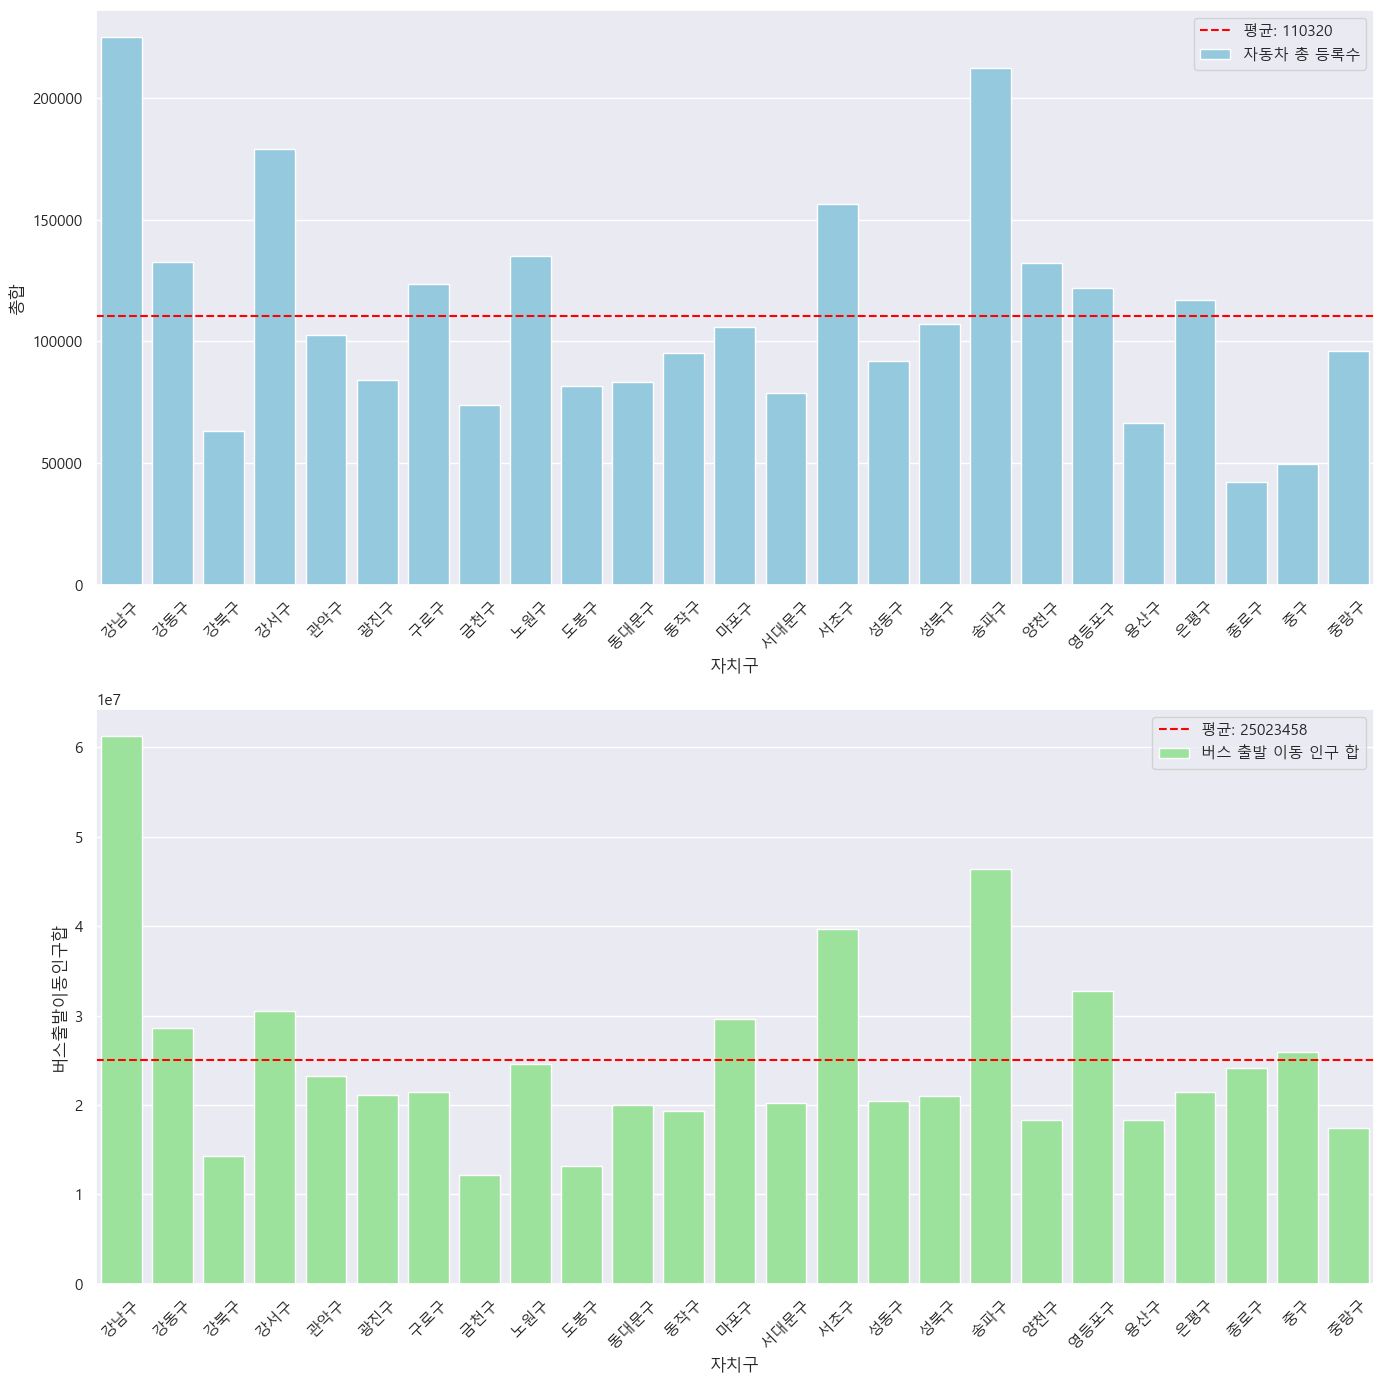

In [55]:
plt.figure(figsize=(14, 14))

# plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['axes.unicode_minus'] = False
plt.subplot(2, 1, 1)
sns.barplot(x='자치구', y='총합', data=car_data, color='skyblue', label='자동차 총 등록수')

mean_total_cars = car_data['총합'].mean()

plt.axhline(mean_total_cars, color='red', linestyle='--', label=f'평균: {mean_total_cars:.0f}')
plt.legend()
plt.xticks(rotation=45)  

plt.subplot(2, 1, 2)
sns.barplot(x='자치구', y='버스출발이동인구합', data=car_data, color='lightgreen', label='버스 출발 이동 인구 합')
mean_bus_population = car_data['버스출발이동인구합'].mean()
plt.axhline(mean_bus_population, color='red', linestyle='--', label=f'평균: {mean_bus_population:.0f}')
plt.legend()
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


### 3)

- **변수의 비지니스 의미**

    - 음식점 종사자 수는 해당 구에 얼마나 많은 음식점 사업이 이루어지고 있나를 나타내며, 해당 사항은 해당 구에 전체적인 유동인구가 많다는 증거가 됩니다.

    - 음식점 종사자 수와 평균 이동 시간에는 관계가 없는 것처럼 보입니다. 이는 음식점 종사자가 먼 곳이 아닌 근처에서 다닐수도 있다는 가능성을 유추할 수 있었습니다.

    - 음식점 종사자 수가 많을 수록 노선의 수가 많아 보이는데 이는 사람이 많이 다니는 위치에 노선의 수가 많고, 사람이 많기에 음식점이 많다는 것을 확인할 수 있었습니다. 하지만 서대문구 종로구와 같이 노선의 수가 많지만 음식점의 수는 적은 지역도 존재합니다.
    
- **전처리 사항**

    - 업종 종사자 수 중 '한식일반음식점', '기타주점', '카페', '한식육류음식점'을 '음식점 수' 하나의 행으로 묶었습니다.
    
   - 각 노선별로 지나는 정류장의 경위도 정보를 통해, 지나가는 자치구를 계산할 때, 중복을 제거하여, 자치구별 고유 노선 갯수를 구하였습니다.
    
- **추가 분석해볼 사항 도출**

    - 중구와 송파구와 같이 음식점의 수가 비슷하지만, 매우 다른 평균 이동 시간을 나타내는 구간은 왜 이동 시간이 그러한 지 추가적인 이유가 필요해 보입니다.

        - 중구와 송파구의 이동인구, 노선수, 정류장수 들을 비교해보고 둘의 평균 이동 시간이 왜 다른지를 나타낼 수 있는지 확인해봐야 될 것 같습니다.


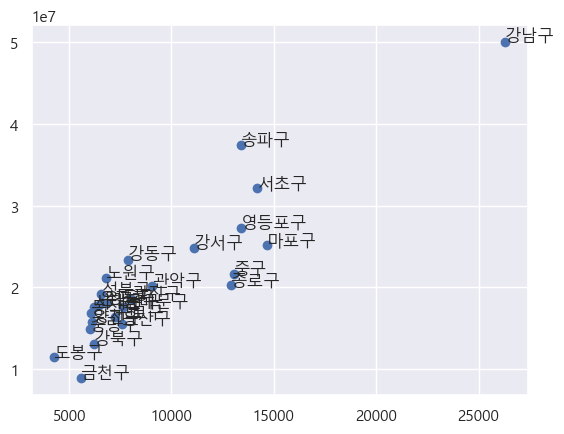

In [56]:
### 음식점 수 vs 노선 수 ##
x = df['음식점수']
y = df['총 이동인구']
n = df['자치구']

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


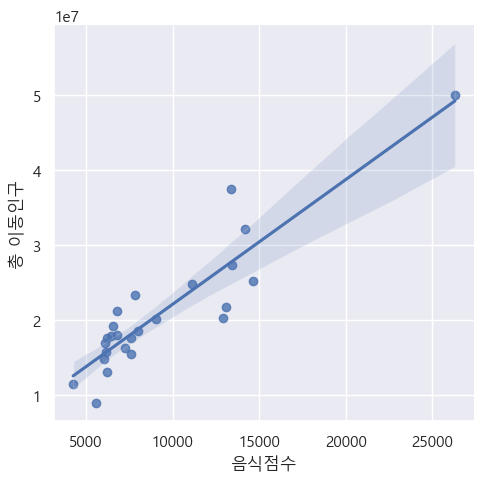

In [57]:
sns.lmplot(x="음식점수", y="총 이동인구", data=df);
plt.show()

#### **추가 데이터 시각화**

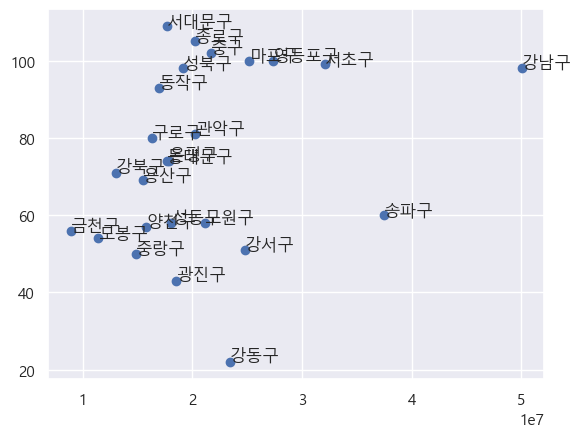

In [58]:
# 총 이동인구 수 / 노선 수

x = df['총 이동인구']
y = df['노선수']
n = df['자치구']

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


In [59]:
import scipy.stats as spst

In [61]:
# target = 

### 1)

- 자치구 면적이 클 수록 이동 시간이 큽니다.

- 정류장수가 많을 수록 이동시간이 큽니다.

- 면적이 클 수록  정류장수가 많습니다.

- 넓이와 정류장수는 **강한 양의 상관관계**를 갖습니다.

- 평균 이동 시간과 **정류장수는 약한 양의 상관관계**를 갖습니다.

- 평균 이동 시간과 넓이는 **약한 양의 상관관계**를 갖습니다.

In [79]:
import pandas as pd
import scipy.stats as stats

# df_table.to_csv('table.csv')

statistic,pvalue = stats.pearsonr(df_table['넓이'],df_table['정류장수'])
print('넓이  정류장수  :',statistic,pvalue )
statistic,pvalue = stats.pearsonr(df_table['넓이'],df_table['평균 이동 시간(분)'])
print('넓이 평균 이동 시간(분)  :',statistic,pvalue )
statistic,pvalue = stats.pearsonr(df_table['정류장수'],df_table['평균 이동 시간(분)'])
print('정류장수 평균 이동 시간(분)  :',statistic,pvalue )
statistic,pvalue = stats.pearsonr(df_table['노선수'],df_table['평균 이동 시간(분)'])
print('노선수 평균 이동 시간(분)  :',statistic,pvalue )


넓이  정류장수  : 0.7258192797459022 4.01709769768881e-05
넓이 평균 이동 시간(분)  : 0.4495437631769537 0.02416223756324472
정류장수 평균 이동 시간(분)  : 0.5370492679329871 0.005637166048056491
노선수 평균 이동 시간(분)  : 0.12117796893125948 0.5639369832521209


### 2)

- 서울 자치구별 차량 등록 수와 버스 출발 인구 합은 **강한 상관관계**를 갖습니다.

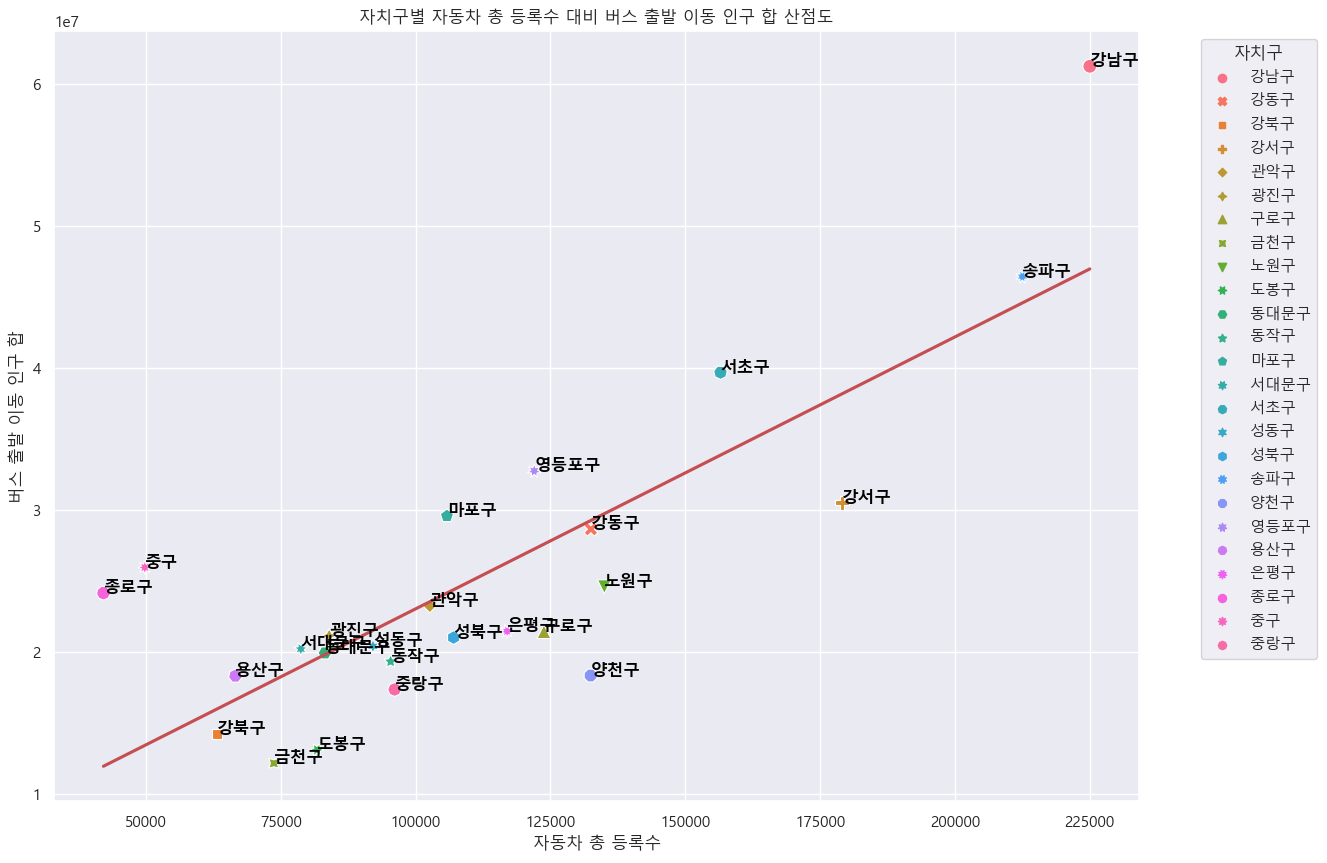

In [62]:
# 산점도 그리기
plt.figure(figsize=(14, 10))
sns.scatterplot(data=car_data, x='총합', y='버스출발이동인구합', hue='자치구', style='자치구', s=100)

# 선형 회귀선 그리기
sns.regplot(data=car_data, x='총합', y='버스출발이동인구합', scatter=False, color="r", ci=None)

# 각 지점에 자치구 이름 표시
for i in range(len(car_data)):
    plt.text(car_data['총합'][i], car_data['버스출발이동인구합'][i], car_data['자치구'][i], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.xlabel('자동차 총 등록수')
plt.ylabel('버스 출발 이동 인구 합')
plt.title('자치구별 자동차 총 등록수 대비 버스 출발 이동 인구 합 산점도')
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

In [64]:
import scipy.stats as spst

In [65]:
spst.pearsonr(car_data['총합'], car_data['버스출발이동인구합'])

PearsonRResult(statistic=0.8050550335610982, pvalue=1.2166252877528055e-06)

### 3)

- 음식점 종사자 수 가설은 숫자 -> 숫자로 상관분석을 사용하였습니다.

    1. 유동인구수와 음식점은 상관관계가 매우 강하고 서로 양수의 관계를 높게 가지고 있습니다. -> **강한 상관관계를 가집니다.**
    
    2. 음식점에 따른 평균 이동 시간은 음식점수와 상관이 없는 것으로 파악할 수 있었습니다. -> **상관관계가 존재하지 않습니다.**
    
    3. 노선수는 어느정도 음식점 개수에 따라 비례하고 있지만 강한 관계를 가지고 있지는 않았습니다. -> **약한 상관관계를 가집니다.**

In [63]:
y1_val = spst.pearsonr(df['음식점수'], df['총 이동인구'])
y2_val = spst.pearsonr(df['음식점수'], df['평균 이동 시간(분)'])
y3_val = spst.pearsonr(df['음식점수'], df['노선수'])

print('1. 음식점 / 유동인구수 =', y1_val)
print()
print('2. 음식점 / 평균 이동 시간 =', y2_val)
print()
print('3. 음식점 / 노선수 =', y3_val)
print()

1. 음식점 / 유동인구수 = PearsonRResult(statistic=0.9087625539440274, pvalue=3.3492622911554334e-10)

2. 음식점 / 평균 이동 시간 = PearsonRResult(statistic=-0.0027101881339331446, pvalue=0.9897417531396839)

3. 음식점 / 노선수 = PearsonRResult(statistic=0.4382894822711772, pvalue=0.028416099981511945)



### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



### 1)

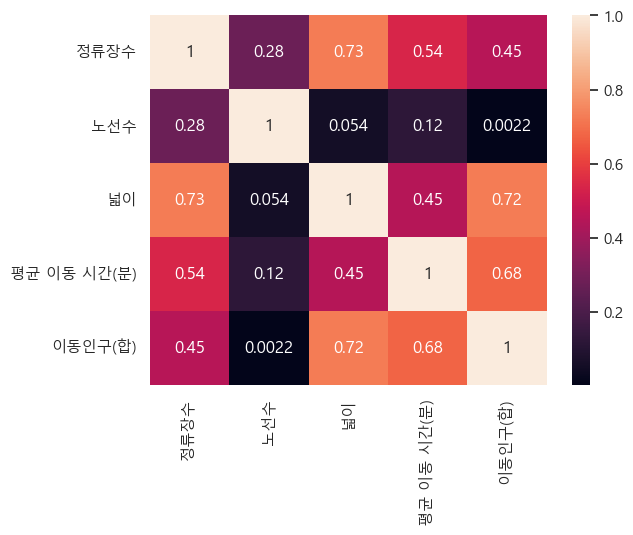

In [80]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
# 가설 1)
sns.heatmap(df_table.iloc[:,1:].corr(), annot = True)
plt.show()

위 차트를 통해 알게된 사실을 정리해봅시다.
1. 자치구별 정류장수가 많을 수록 평균 이동 시간이 크다.
2. 자치구별 정류장수가 많을 수록 넓이가 크다.
3. 자치구 넓이와 평균 이동 시간간의 약한 선형관계를 가진다.

### 3)

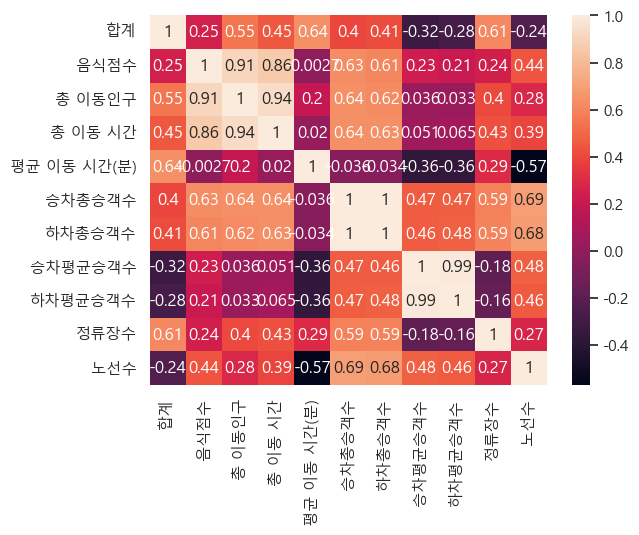

In [82]:
sns.heatmap(df[['합계', '음식점수', '총 이동인구', '총 이동 시간', '평균 이동 시간(분)', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수','정류장수', '노선수']].corr(), annot = True)
plt.show()

위 차트를 통해 알게된 사실

1. 음식점 종사자 수와 총 이동인구가 가장 강한 관계를 가지고 있습니다.
2. 다음으로 가장 강한 관계는 총 이동시간으로 이동인구와 이동시간의 상간관계가 강한 관계이기에 음식점 종사자 수와도 영향이 있는 것으로 보입니다.
3. 음식점수와 평균 이동 시간은 0,002로 매우 약한 사실상 존재하지 않는 관계를 가지고 있습니다.

## 4.관계 정리

### 1) 강한 관계의 변수

- 자치구별 면적과 정류장 수

- 음식점 종사자 수와 유동인구 수

### 2) 약한 관계의 변수

- 음식점 종사자 수와 평균 이동시간

- 노선 수와 평균 이동시간

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.

- 강서구, 중랑구, 도봉구
    - 가설 2와 3의 분석을 도합했을 때, 음식점 종사자수가 많고, 대중교통 이용자에 비해 차량 등록 숫자가 높은 자치구를 선택하였습니다.
    
- 영등포
    - 가설 1에서 동일한 자치구 내에서 분석했을 때, 면적이 넓지도 않고, 정류장 수도 많지 않은데 평균 이동시간이 많은 지역이라서 선택했습니다.